#Step 1

#Load the data. Create a network diagram which demonstrates the way users move between chapters

#across all the books within the dataset.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import networkx as nx

In [4]:
import matplotlib.pyplot as plt

In [5]:
from ipywidgets import interact, Select

In [6]:
from IPython.display import display

In [7]:
df=pd.read_csv('C:\\Users\\Eric\\Desktop\\dataset.csv')

In [8]:
df.head(6)

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_textbook_sales_id,user_owns_book
0,-2147277864,1,"""2019-10-27 08:58:15""",chapter-8,bhargava,888,440,610,1
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1
3,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,thomas,445,136,816,1
4,-2146168866,2,"""2019-11-27 05:09:29""",about-this-book,prasanna,21,14,273,0
5,-2145886989,1,"""2019-12-12 11:02:49""",chapter-9,hillard,1971,377,1085,0


In [9]:
df.tail(5).T

,4994,4995,4996,4997,4998
user_id,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583
number_of_ticks,15,3,2,5,24
date_created,"""2019-12-07 22:02:29""","""2019-11-26 07:44:44""","""2019-11-26 07:46:14""","""2019-11-12 13:47:10""","""2019-11-28 07:35:47"""
chapter,chapter-1,chapter-1,chapter-1,chapter-7,chapter-3
book,roestenburg,urma2,urma2,urma2,urma2
numberofentriesofbook,344,2210,2210,2210,2210
numberofusersofbook,65,500,500,500,500
product_textbook_sales_id,486,786,786,786,786
user_owns_book,0,1,1,1,1


In [10]:
df.sample(5).T

,1319,1355,2903,40,1421
user_id,-2105263262,-2101438401,-2071274702,-2145886989,-2100825959
number_of_ticks,1,4,5,2,14
date_created,"""2019-11-09 20:58:00""","""2019-12-05 16:36:40""","""2019-10-22 04:30:13""","""2019-12-15 22:04:33""","""2019-10-25 06:48:33"""
chapter,welcome,chapter-1,chapter-2,chapter-5,chapter-4
book,stevens2,huaylupo,luksa,mcnamara,jones4
numberofentriesofbook,3148,313,2836,2533,164
numberofusersofbook,609,108,572,461,59
product_textbook_sales_id,970,1184,803,880,500
user_owns_book,0,1,1,1,1


We would like to create an edgelist by sorting the data by user_id and the date created.

In [11]:
df=df.sort_values(by=['user_id', 'date_created'])

In [12]:
df.head()

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_textbook_sales_id,user_owns_book
0,-2147277864,1,"""2019-10-27 08:58:15""",chapter-8,bhargava,888,440,610,1
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1
3,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,thomas,445,136,816,1
4,-2146168866,2,"""2019-11-27 05:09:29""",about-this-book,prasanna,21,14,273,0


In [13]:
df.tail()

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_textbook_sales_id,user_owns_book
4990,-2019295583,10,"""2019-12-07 16:09:21""",chapter-1,roestenburg,344,65,486,0
4991,-2019295583,102,"""2019-12-07 16:14:21""",chapter-1,roestenburg,344,65,486,0
4992,-2019295583,107,"""2019-12-07 17:51:22""",chapter-1,roestenburg,344,65,486,0
4993,-2019295583,98,"""2019-12-07 20:54:58""",chapter-1,roestenburg,344,65,486,0
4994,-2019295583,15,"""2019-12-07 22:02:29""",chapter-1,roestenburg,344,65,486,0


Set the book and chapter combined column to be equal to the source column (A reader reads book a then book b then book c then a connects with b and b connects c) Nodes- books in the platform edges- order in which people have read the books within the platform we want to transform the dataset into an edge list with source and target columns whereby the source is the book the user was reading and the target is the next book the user read

Our interest the users' reading habits. The edge list contains the combination of source and target. For each row the source is simply the book they are currently reading and the target is the book they will read next

In [14]:
df.columns

Index(['user_id', 'number_of_ticks', 'date_created', 'chapter', 'book',
       'numberofentriesofbook', 'numberofusersofbook',
       'product_textbook_sales_id', 'user_owns_book'],
      dtype='object')

In [15]:
df['book_chapter']=df['chapter'].astype(str) + df['book'].astype(str)

In [16]:
df.T

,0,1,2,3,4,29,32,7,8,11,...,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994
user_id,-2147277864,-2146355313,-2146355313,-2146355313,-2146168866,-2145886989,-2145886989,-2145886989,-2145886989,-2145886989,...,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583
number_of_ticks,1,8,8,8,2,10,10,1,5,12,...,1,2,28,4,6,10,102,107,98,15
date_created,"""2019-10-27 08:58:15""","""2019-12-14 10:05:50""","""2019-12-14 10:05:50""","""2019-12-14 10:05:50""","""2019-11-27 05:09:29""","""2019-12-10 13:07:05""","""2019-12-10 13:41:25""","""2019-12-10 19:37:20""","""2019-12-10 19:37:50""","""2019-12-11 12:18:30""",...,"""2019-12-07 15:41:48""","""2019-12-07 15:42:38""","""2019-12-07 15:43:11""","""2019-12-07 15:58:10""","""2019-12-07 16:00:11""","""2019-12-07 16:09:21""","""2019-12-07 16:14:21""","""2019-12-07 17:51:22""","""2019-12-07 20:54:58""","""2019-12-07 22:02:29"""
chapter,chapter-8,chapter-8,chapter-1,chapter-1,about-this-book,chapter-4,chapter-4,chapter-1,chapter-1,chapter-1,...,chapter-4,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1
book,bhargava,fain3,ramamurthy,thomas,prasanna,mcnamara,mcnamara,mcnamara,mcnamara,mcnamara,...,devore,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg
numberofentriesofbook,888,737,715,445,21,2533,2533,2533,2533,2533,...,167,344,344,344,344,344,344,344,344,344
numberofusersofbook,440,225,202,136,14,461,461,461,461,461,...,46,65,65,65,65,65,65,65,65,65
product_textbook_sales_id,610,1069,1120,816,273,880,880,880,880,880,...,634,486,486,486,486,486,486,486,486,486
user_owns_book,1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
book_chapter,chapter-8bhargava,chapter-8fain3,chapter-1ramamurthy,chapter-1thomas,about-this-bookprasanna,chapter-4mcnamara,chapter-4mcnamara,chapter-1mcnamara,chapter-1mcnamara,chapter-1mcnamara,...,chapter-4devore,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg


In [17]:
df['source']=df['book_chapter']

In [18]:
df.T

,0,1,2,3,4,29,32,7,8,11,...,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994
user_id,-2147277864,-2146355313,-2146355313,-2146355313,-2146168866,-2145886989,-2145886989,-2145886989,-2145886989,-2145886989,...,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583
number_of_ticks,1,8,8,8,2,10,10,1,5,12,...,1,2,28,4,6,10,102,107,98,15
date_created,"""2019-10-27 08:58:15""","""2019-12-14 10:05:50""","""2019-12-14 10:05:50""","""2019-12-14 10:05:50""","""2019-11-27 05:09:29""","""2019-12-10 13:07:05""","""2019-12-10 13:41:25""","""2019-12-10 19:37:20""","""2019-12-10 19:37:50""","""2019-12-11 12:18:30""",...,"""2019-12-07 15:41:48""","""2019-12-07 15:42:38""","""2019-12-07 15:43:11""","""2019-12-07 15:58:10""","""2019-12-07 16:00:11""","""2019-12-07 16:09:21""","""2019-12-07 16:14:21""","""2019-12-07 17:51:22""","""2019-12-07 20:54:58""","""2019-12-07 22:02:29"""
chapter,chapter-8,chapter-8,chapter-1,chapter-1,about-this-book,chapter-4,chapter-4,chapter-1,chapter-1,chapter-1,...,chapter-4,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1
book,bhargava,fain3,ramamurthy,thomas,prasanna,mcnamara,mcnamara,mcnamara,mcnamara,mcnamara,...,devore,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg
numberofentriesofbook,888,737,715,445,21,2533,2533,2533,2533,2533,...,167,344,344,344,344,344,344,344,344,344
numberofusersofbook,440,225,202,136,14,461,461,461,461,461,...,46,65,65,65,65,65,65,65,65,65
product_textbook_sales_id,610,1069,1120,816,273,880,880,880,880,880,...,634,486,486,486,486,486,486,486,486,486
user_owns_book,1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
book_chapter,chapter-8bhargava,chapter-8fain3,chapter-1ramamurthy,chapter-1thomas,about-this-bookprasanna,chapter-4mcnamara,chapter-4mcnamara,chapter-1mcnamara,chapter-1mcnamara,chapter-1mcnamara,...,chapter-4devore,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg


Create the target and do a user check

In [19]:
df['target']=df['source'].shift(-1)

In [20]:
df.T

,0,1,2,3,4,29,32,7,8,11,...,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994
user_id,-2147277864,-2146355313,-2146355313,-2146355313,-2146168866,-2145886989,-2145886989,-2145886989,-2145886989,-2145886989,...,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583
number_of_ticks,1,8,8,8,2,10,10,1,5,12,...,1,2,28,4,6,10,102,107,98,15
date_created,"""2019-10-27 08:58:15""","""2019-12-14 10:05:50""","""2019-12-14 10:05:50""","""2019-12-14 10:05:50""","""2019-11-27 05:09:29""","""2019-12-10 13:07:05""","""2019-12-10 13:41:25""","""2019-12-10 19:37:20""","""2019-12-10 19:37:50""","""2019-12-11 12:18:30""",...,"""2019-12-07 15:41:48""","""2019-12-07 15:42:38""","""2019-12-07 15:43:11""","""2019-12-07 15:58:10""","""2019-12-07 16:00:11""","""2019-12-07 16:09:21""","""2019-12-07 16:14:21""","""2019-12-07 17:51:22""","""2019-12-07 20:54:58""","""2019-12-07 22:02:29"""
chapter,chapter-8,chapter-8,chapter-1,chapter-1,about-this-book,chapter-4,chapter-4,chapter-1,chapter-1,chapter-1,...,chapter-4,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1
book,bhargava,fain3,ramamurthy,thomas,prasanna,mcnamara,mcnamara,mcnamara,mcnamara,mcnamara,...,devore,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg
numberofentriesofbook,888,737,715,445,21,2533,2533,2533,2533,2533,...,167,344,344,344,344,344,344,344,344,344
numberofusersofbook,440,225,202,136,14,461,461,461,461,461,...,46,65,65,65,65,65,65,65,65,65
product_textbook_sales_id,610,1069,1120,816,273,880,880,880,880,880,...,634,486,486,486,486,486,486,486,486,486
user_owns_book,1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
book_chapter,chapter-8bhargava,chapter-8fain3,chapter-1ramamurthy,chapter-1thomas,about-this-bookprasanna,chapter-4mcnamara,chapter-4mcnamara,chapter-1mcnamara,chapter-1mcnamara,chapter-1mcnamara,...,chapter-4devore,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg


In [21]:
df['user_check']=df['user_id'].shift(-1)

In [22]:
df.T

,0,1,2,3,4,29,32,7,8,11,...,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994
user_id,-2147277864,-2146355313,-2146355313,-2146355313,-2146168866,-2145886989,-2145886989,-2145886989,-2145886989,-2145886989,...,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583
number_of_ticks,1,8,8,8,2,10,10,1,5,12,...,1,2,28,4,6,10,102,107,98,15
date_created,"""2019-10-27 08:58:15""","""2019-12-14 10:05:50""","""2019-12-14 10:05:50""","""2019-12-14 10:05:50""","""2019-11-27 05:09:29""","""2019-12-10 13:07:05""","""2019-12-10 13:41:25""","""2019-12-10 19:37:20""","""2019-12-10 19:37:50""","""2019-12-11 12:18:30""",...,"""2019-12-07 15:41:48""","""2019-12-07 15:42:38""","""2019-12-07 15:43:11""","""2019-12-07 15:58:10""","""2019-12-07 16:00:11""","""2019-12-07 16:09:21""","""2019-12-07 16:14:21""","""2019-12-07 17:51:22""","""2019-12-07 20:54:58""","""2019-12-07 22:02:29"""
chapter,chapter-8,chapter-8,chapter-1,chapter-1,about-this-book,chapter-4,chapter-4,chapter-1,chapter-1,chapter-1,...,chapter-4,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1
book,bhargava,fain3,ramamurthy,thomas,prasanna,mcnamara,mcnamara,mcnamara,mcnamara,mcnamara,...,devore,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg
numberofentriesofbook,888,737,715,445,21,2533,2533,2533,2533,2533,...,167,344,344,344,344,344,344,344,344,344
numberofusersofbook,440,225,202,136,14,461,461,461,461,461,...,46,65,65,65,65,65,65,65,65,65
product_textbook_sales_id,610,1069,1120,816,273,880,880,880,880,880,...,634,486,486,486,486,486,486,486,486,486
user_owns_book,1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
book_chapter,chapter-8bhargava,chapter-8fain3,chapter-1ramamurthy,chapter-1thomas,about-this-bookprasanna,chapter-4mcnamara,chapter-4mcnamara,chapter-1mcnamara,chapter-1mcnamara,chapter-1mcnamara,...,chapter-4devore,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg


Drop rows where the user_id is not equal to the id_check

In [23]:
df['keep_drop']=np.where((df['user_check']==df['user_id']), df['user_id'], np.nan)

In [24]:
df.T

,0,1,2,3,4,29,32,7,8,11,...,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994
user_id,-2147277864,-2146355313,-2146355313,-2146355313,-2146168866,-2145886989,-2145886989,-2145886989,-2145886989,-2145886989,...,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583
number_of_ticks,1,8,8,8,2,10,10,1,5,12,...,1,2,28,4,6,10,102,107,98,15
date_created,"""2019-10-27 08:58:15""","""2019-12-14 10:05:50""","""2019-12-14 10:05:50""","""2019-12-14 10:05:50""","""2019-11-27 05:09:29""","""2019-12-10 13:07:05""","""2019-12-10 13:41:25""","""2019-12-10 19:37:20""","""2019-12-10 19:37:50""","""2019-12-11 12:18:30""",...,"""2019-12-07 15:41:48""","""2019-12-07 15:42:38""","""2019-12-07 15:43:11""","""2019-12-07 15:58:10""","""2019-12-07 16:00:11""","""2019-12-07 16:09:21""","""2019-12-07 16:14:21""","""2019-12-07 17:51:22""","""2019-12-07 20:54:58""","""2019-12-07 22:02:29"""
chapter,chapter-8,chapter-8,chapter-1,chapter-1,about-this-book,chapter-4,chapter-4,chapter-1,chapter-1,chapter-1,...,chapter-4,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1
book,bhargava,fain3,ramamurthy,thomas,prasanna,mcnamara,mcnamara,mcnamara,mcnamara,mcnamara,...,devore,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg
numberofentriesofbook,888,737,715,445,21,2533,2533,2533,2533,2533,...,167,344,344,344,344,344,344,344,344,344
numberofusersofbook,440,225,202,136,14,461,461,461,461,461,...,46,65,65,65,65,65,65,65,65,65
product_textbook_sales_id,610,1069,1120,816,273,880,880,880,880,880,...,634,486,486,486,486,486,486,486,486,486
user_owns_book,1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
book_chapter,chapter-8bhargava,chapter-8fain3,chapter-1ramamurthy,chapter-1thomas,about-this-bookprasanna,chapter-4mcnamara,chapter-4mcnamara,chapter-1mcnamara,chapter-1mcnamara,chapter-1mcnamara,...,chapter-4devore,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg


In [25]:
df=df.dropna(subset=['keep_drop'])

In [26]:
df.T

,1,2,29,32,7,8,11,9,10,12,...,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993
user_id,-2146355313,-2146355313,-2145886989,-2145886989,-2145886989,-2145886989,-2145886989,-2145886989,-2145886989,-2145886989,...,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583,-2019295583
number_of_ticks,8,8,10,10,1,5,12,1,1,1,...,4,1,2,28,4,6,10,102,107,98
date_created,"""2019-12-14 10:05:50""","""2019-12-14 10:05:50""","""2019-12-10 13:07:05""","""2019-12-10 13:41:25""","""2019-12-10 19:37:20""","""2019-12-10 19:37:50""","""2019-12-11 12:18:30""","""2019-12-11 12:19:01""","""2019-12-11 12:23:31""","""2019-12-11 12:25:31""",...,"""2019-11-28 13:30:20""","""2019-12-07 15:41:48""","""2019-12-07 15:42:38""","""2019-12-07 15:43:11""","""2019-12-07 15:58:10""","""2019-12-07 16:00:11""","""2019-12-07 16:09:21""","""2019-12-07 16:14:21""","""2019-12-07 17:51:22""","""2019-12-07 20:54:58"""
chapter,chapter-8,chapter-1,chapter-4,chapter-4,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,...,chapter-1,chapter-4,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1,chapter-1
book,fain3,ramamurthy,mcnamara,mcnamara,mcnamara,mcnamara,mcnamara,mcnamara,mcnamara,mcnamara,...,richardson3,devore,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg,roestenburg
numberofentriesofbook,737,715,2533,2533,2533,2533,2533,2533,2533,2533,...,2909,167,344,344,344,344,344,344,344,344
numberofusersofbook,225,202,461,461,461,461,461,461,461,461,...,811,46,65,65,65,65,65,65,65,65
product_textbook_sales_id,1069,1120,880,880,880,880,880,880,880,880,...,882,634,486,486,486,486,486,486,486,486
user_owns_book,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
book_chapter,chapter-8fain3,chapter-1ramamurthy,chapter-4mcnamara,chapter-4mcnamara,chapter-1mcnamara,chapter-1mcnamara,chapter-1mcnamara,chapter-1mcnamara,chapter-1mcnamara,chapter-1mcnamara,...,chapter-1richardson3,chapter-4devore,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg,chapter-1roestenburg


In [27]:
G=nx.from_pandas_edgelist(df,'source','target', create_using=nx.DiGraph)

C:\Users\Eric\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Eric\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


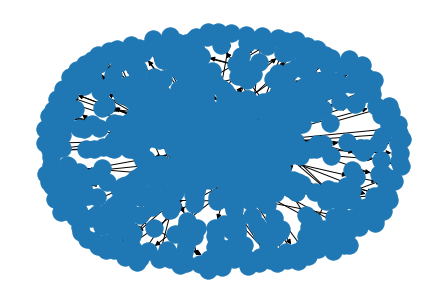

In [28]:
nx.draw(G)

In [29]:
df.to_csv('data_for_gephi.csv')

Using gephi for visualization